# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "PetersenEtAl2011"
sys.path.append(str(MODEL_DIR))

import run_displacement_profile

# View the docstrings

In [3]:
help(run_displacement_profile)

Help on module run_displacement_profile:

NAME
    run_displacement_profile

DESCRIPTION
    This file runs the PEA11 principal fault displacement model to create a slip profile.
    - Any number of scenarios are allowed (e.g., user can enter multiple magnitudes).
    - The results are returned in a pandas DataFrame.
    - Only the principal fault displacement models for direct (i.e., not normalized) predictions are
    implemented herein currently.
    - Command-line use is supported; try `python run_displacement_profile.py --help`
    - Module use is supported; try `from run_displacement_profile import run_profile`
    
    # NOTE: This script just loops over locations in `run_displacement_model.py`
    
    Reference: https://doi.org/10.1785/0120100035

FUNCTIONS
    main()
    
    run_profile(*, magnitude: Union[float, int, List[Union[float, int]], numpy.ndarray], percentile: Union[float, int, List[Union[float, int]], numpy.ndarray], submodel: Union[str, List[str], numpy.ndarray] 

# Run profile

## Single scenarios

A single scenario is defined as a magnitude/percentile/submodel. The default submodel is the elliptical model. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
mag, perc = 6.8, 0.5

results = run_displacement_profile.run_profile(magnitude=mag, percentile=perc)

results.head()

,magnitude,location,style,percentile,model_name,mu,sigma,displ
0,6.8,0.00,strike-slip,0.5,elliptical,0.971160,1.1348,0.026410
1,6.8,0.05,strike-slip,0.5,elliptical,2.411384,1.1348,0.111494
2,6.8,0.10,strike-slip,0.5,elliptical,2.953620,1.1348,0.191752
3,6.8,0.15,strike-slip,0.5,elliptical,3.330759,1.1348,0.279596
4,6.8,0.20,strike-slip,0.5,elliptical,3.614440,1.1348,0.371305


The default location spacing is 0.05, but it can be changed with `location_step=0.01`, for example:

In [5]:
results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, location_step=0.01
)

results.head()

,magnitude,location,style,percentile,model_name,mu,sigma,displ
0,6.8,0.00,strike-slip,0.5,elliptical,0.971160,1.1348,0.026410
1,6.8,0.01,strike-slip,0.5,elliptical,1.628668,1.1348,0.050971
2,6.8,0.02,strike-slip,0.5,elliptical,1.896308,1.1348,0.066613
3,6.8,0.03,strike-slip,0.5,elliptical,2.098434,1.1348,0.081534
4,6.8,0.04,strike-slip,0.5,elliptical,2.266097,1.1348,0.096417


And the profile can be plotted:

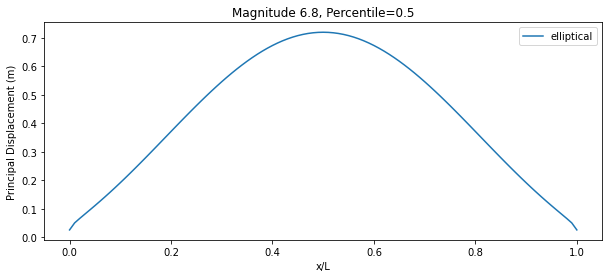

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x, y = results["location"], results["displ"]
ax.plot(x, y, label=results["model_name"].iloc[0])
title = f"Magnitude {mag}, Percentile={perc}"
ax.set(xlabel="x/L", ylabel="Principal Displacement (m)", title=title)
ax.legend(loc="best");

This model should only be used for strike-slip faulting. That is the default style. A `UserWarning` will be issued and the user input will be over-ridden in the output table if another style is entered, such as `style="reverse"`:

In [7]:
results = run_displacement_profile.run_profile(
    magnitude=mag, percentile=perc, style="normal"
)

results.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\PetersenEtAl2011\run_displacement_model.py:172: UserWarning: This model is only recommended for strike-slip faulting, but 'normal' was entered.User input will be over-ridden.
  warnings.warn(


,magnitude,location,style,percentile,model_name,mu,sigma,displ
0,6.8,0.00,strike-slip,0.5,elliptical,0.971160,1.1348,0.026410
1,6.8,0.05,strike-slip,0.5,elliptical,2.411384,1.1348,0.111494
2,6.8,0.10,strike-slip,0.5,elliptical,2.953620,1.1348,0.191752
3,6.8,0.15,strike-slip,0.5,elliptical,3.330759,1.1348,0.279596
4,6.8,0.20,strike-slip,0.5,elliptical,3.614440,1.1348,0.371305


The Petersen et al. (2011) model provides three alternative submodels for different profile shapes. The default is the elliptical model, but the user can choose other options, such as `submodel="quadratic"`. An error results if the wrong submodel is entered:

In [8]:
try:
    results = run_displacement_profile.run_profile(
        magnitude=mag, percentile=perc, submodel="meow"
    )
except ValueError as e:
    print(e)

Invalid submodel names: ['meow']. Supported submodels are ['elliptical', 'quadratic', 'bilinear'].


In [9]:
del mag, perc

## Multiple scenarios

Multiple magnitude/percentile/submodel scenarios can be run. All combinations of magnitudes, percentiles, and submodels are run. Here is an example.

In [10]:
mags, perc, shape = [6, 6.5, 7, 7.5, 8], 0.5, "Elliptical"

results = run_displacement_profile.run_profile(
    magnitude=mags, percentile=perc, submodel=shape
)

display(results.head())
display(results.tail())

,magnitude,location,style,percentile,model_name,mu,sigma,displ
0,6.0,0.00,strike-slip,0.5,elliptical,-0.463000,1.1348,0.006294
1,6.0,0.05,strike-slip,0.5,elliptical,0.977224,1.1348,0.026571
2,6.0,0.10,strike-slip,0.5,elliptical,1.519460,1.1348,0.045698
3,6.0,0.15,strike-slip,0.5,elliptical,1.896599,1.1348,0.066632
4,6.0,0.20,strike-slip,0.5,elliptical,2.180280,1.1348,0.088488


,magnitude,location,style,percentile,model_name,mu,sigma,displ
100,8.0,0.80,strike-slip,0.5,elliptical,5.765680,1.1348,3.191560
101,8.0,0.85,strike-slip,0.5,elliptical,5.481999,1.1348,2.403267
102,8.0,0.90,strike-slip,0.5,elliptical,5.104860,1.1348,1.648210
103,8.0,0.95,strike-slip,0.5,elliptical,4.562624,1.1348,0.958346
104,8.0,1.00,strike-slip,0.5,elliptical,3.122400,1.1348,0.227008


And we can plot the different scenarios:

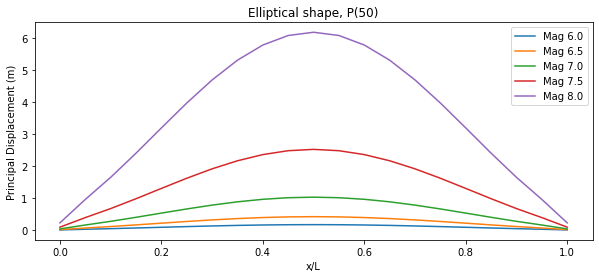

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

for m, group in results.groupby(["magnitude"]):
    x, y = group["location"], group["displ"]
    label = f"Mag {m}"
    ax.plot(x, y, label=label)

ptile = "Mean" if perc == -1 else f"P({int(perc*100)})"
title = f"Elliptical shape, {ptile}"
ax.set(xlabel="x/L", ylabel="Principal Displacement (m)", title=title)
ax.legend(loc="best");

## *** #FIXME: Bilinear model

There is a problem with how the bilinear model is currently implemented for anything except the median (50th percentile). The standard deviation changes across $l/L$ and Figure 5b in PEA11 cannot be reproduced. 

By default, values that are not the median will be dropped from the results; however, this can be over-ridden for debugging purposes with `debug_bilinear_model=True`:

In [12]:
mags, perc, shape, step = 7, [0.5, 0.84], "bilinear", 0.01

results = run_displacement_profile.run_profile(
    magnitude=mags,
    percentile=perc,
    submodel=shape,
    location_step=step,
    debug_bilinear_model=True,
)

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\PetersenEtAl2011\run_displacement_model.py:252: UserWarning: #FIXME: Don't use the bilinear model for anything except median 50th percentile; current code does not reproduce Fig 5b in P11.
  warnings.warn(


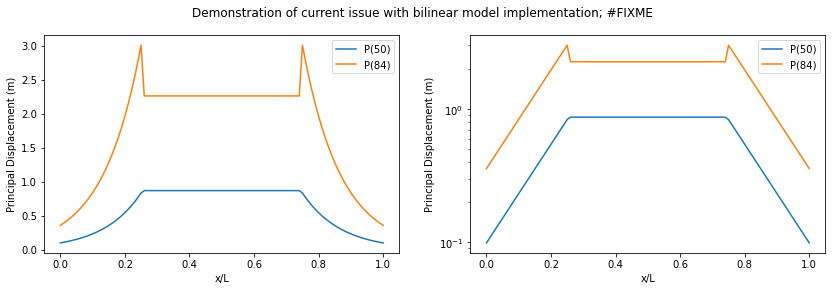

In [13]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14, 4))

for p, group in results.groupby(["percentile"]):
    x, y = group["location"], group["displ"]
    label ="Mean" if p == -1 else f"P({int(p*100)})"
    ax1.plot(x, y, label=label)
    ax2.semilogy(x, y, label=label)

for _ax in [ax1, ax2]:
    _ax.set(xlabel="x/L", ylabel="Principal Displacement (m)")
    _ax.legend(loc="best")

title = "Demonstration of current issue with bilinear model implementation; #FIXME"
fig.suptitle(title);